In [1]:
import csv
import ndjson
import os
import sys

In [2]:
base_path = os.getcwd().split('sliver-maestro')[0]
root_path = os.path.join(base_path, "sliver-maestro")
print("root_path: {}".format(root_path))

root_path: C:\Users\ozgur\Desktop\sandbox\sliver-maestro


In [3]:
sys.path.insert(1, root_path)
from src.utils.model_utils import *
from src.draw_model import *

In [4]:
config = ConfigParser()
config_file = "config.cfg"
config_path = os.path.join(root_path, "src", config_file)
config.read_file(open(config_path))

In [5]:
categories_file = os.path.join(root_path, "src", "data", "categories.csv")

In [6]:
with open(categories_file, newline='') as f:
    reader = csv.reader(f)
    categories = {rows[0]:rows[0] for rows in reader}

#### Select a category to download images from 

In [7]:
for key, value in categories.items():
    #print(key)
    pass

In [8]:
print("Selected category from the list above:")
#category=input()
category='cat'
print(category)

Selected category from the list above:
cat


In [9]:
print("Creating directories to save images, weights and the model ...")
src_list, dst_list, paths_dict = create_folders(root_path, categories, category)

for (src_file, dst_file) in zip(src_list, dst_list): 
    print('src_file: {}, dst_file: {}'.format(src_file, dst_file))

Creating directories to save images, weights and the model ...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\positions folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\save\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\input\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\raw\cat folder exists...
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat folder exists...
src_file: gs://quickdraw_dataset/full/numpy_bitmap/cat.np

In [10]:
for (src_file, dst_file) in zip(src_list, dst_list): 
    !gsutil -m cp {src_file} {dst_file}

Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
/ [0/1 files][    0.0 B/ 92.1 MiB]   0% Done                                    
-
- [0/1 files][  2.3 MiB/ 92.1 MiB]   2% Done                                    
\
|
| [0/1 files][  8.2 MiB/ 92.1 MiB]   8% Done                                    
/
/ [0/1 files][ 13.4 MiB/ 92.1 MiB]  14% Done                                    
-
\
\ [0/1 files][ 18.3 MiB/ 92.1 MiB]  19% Done                                    
|
| [0/1 files][ 23.2 MiB/ 92.1 MiB]  25% Done                                    
/
-
- [0/1 files][ 28.9 MiB/ 92.1 MiB]  31% Done                                    
\
|
| [0/1 files][ 34.3 MiB/ 92.1 MiB]  37% Done                                    
/
/ [0/1 files][ 39.4 MiB/ 92.1 MiB]  42% Done                                    
-
\
\ [0/1 files][ 44.3 MiB/ 92.1 MiB]  48% Done                                    
|
/
/ [0/1 files][ 50.3 MiB/ 92.1 MiB]  54% Done                                    
-
- [0/1 files][ 

In [11]:
npy_data = np.load(paths_dict['base_input'] + '.npy', allow_pickle=True)


\
|
| [0/1 files][294.8 MiB/496.9 MiB]  59% Done   3.5 MiB/s ETA 00:00:58           
/
-
- [0/1 files][298.4 MiB/496.9 MiB]  60% Done   3.5 MiB/s ETA 00:00:57           
\
\ [0/1 files][301.5 MiB/496.9 MiB]  60% Done   3.3 MiB/s ETA 00:00:59           
|
/
/ [0/1 files][305.1 MiB/496.9 MiB]  61% Done   3.3 MiB/s ETA 00:00:58           
-
\
\ [0/1 files][309.0 MiB/496.9 MiB]  62% Done   3.4 MiB/s ETA 00:00:56           
|
| [0/1 files][312.6 MiB/496.9 MiB]  62% Done   3.4 MiB/s ETA 00:00:55           
/
-
- [0/1 files][316.2 MiB/496.9 MiB]  63% Done   3.4 MiB/s ETA 00:00:52           
\
|
| [0/1 files][319.6 MiB/496.9 MiB]  64% Done   3.4 MiB/s ETA 00:00:52           
/
/ [0/1 files][323.2 MiB/496.9 MiB]  65% Done   3.3 MiB/s ETA 00:00:52           
-
\
\ [0/1 files][326.3 MiB/496.9 MiB]  65% Done   3.2 MiB/s ETA 00:00:53           
|
| [0/1 files][329.4 MiB/496.9 MiB]  66% Done   3.1 MiB/s ETA 00:00:55           
/
-
- [0/1 files][332.4 MiB/496.9 MiB]  66% Done   3.0 MiB/s ETA 00:00:5

In [12]:
# load from file-like objects
with open(paths_dict['base_raw'] + '.ndjson') as f:
    ndjson_data = ndjson.load(f)

In [13]:
def plot_bitmap():
    print("Bitmap image:")
    plt.imshow(npy_data[int(index)].reshape(28,28))

In [14]:
def plot_raw():
    print("Raw image:")
    i = 0
    for stroke in ndjson_data[int(index)]['drawing']:
        stroke = np.array(stroke)
        plt.plot(stroke[0], stroke[1]*-1)
        i += 1
    print('There are', i, 'number of strokes in this raw image file!')

There are  123203  images in selected category cat
Select an index value from 0 to 123202 to display and compare bitmap and raw images:
Bitmap image:


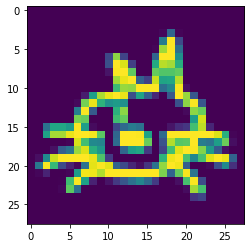

Raw image:
There are 9 number of strokes in this raw image file!


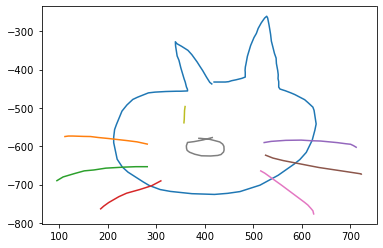

In [15]:
print('There are ', len(npy_data)+1, ' images in selected category', categories[category])
print("Select an index value from 0 to", len(npy_data), "to display and compare bitmap and raw images:")
#index=input()
index='0'
plot_bitmap()
plt.show()
plot_raw()

In [16]:
# TRAIN TEST SPLIT
filepath = paths_dict['input_path']
x_train, x_test, y_train, y_test = split_data(filepath, categories[category], shuffle=False)

In [17]:
T = int(config['DRAW']['T'])
batch_size = int(config['DRAW']['batch_size'])
A = int(config['DRAW']['A'])
B = int(config['DRAW']['B'])
z_size = int(config['DRAW']['z_size'])
N = int(config['DRAW']['N'])
dec_size = int(config['DRAW']['dec_size'])
enc_size = int(config['DRAW']['enc_size'])
epoch_num = int(config['DRAW']['epoch_num'])
learning_rate = float(config['DRAW']['learning_rate'])
beta1 = float(config['DRAW']['beta1'])
USE_CUDA = eval(config['DRAW']['USE_CUDA'])
clip = float(config['DRAW']['clip'])
path = os.path.join(root_path, "src", config['DRAW']['path'])
image_output_file=os.path.join(root_path, "src", config['DRAW']['image_output_file'])
base_img_name=os.path.join(root_path, "src", config['DRAW']['base_img_name'])

In [18]:
# TRAINING AND TESTING

train_data = Dataset(x_train)
print('training data length:', int(len(train_data.data)/batch_size))

test_data = Dataset(x_test)
print('test data length:', int(len(test_data.data)/batch_size))

model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)

if USE_CUDA:
    model.cuda()

def train():
    print("training...")
    img_loc = {'startr':0,
               'endr':30,
               'startc':0,
               'endc':30}
    model.start(img_loc, epoch_num, phase='train') 

def test():    
    print("testing...")
    img_loc = {'startr':0,
               'endr':30,
               'startc':0,
               'endc':30}    
    model.start(img_loc, epoch_num, phase='test')

training data length: 1540
test data length: 385


In [19]:
#epoch_num = 1

training...
start, end:0, 64


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\draw_model.py:221: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.parameters(), self.clip)


start, end:64, 128
start, end:128, 192
start, end:192, 256
start, end:256, 320
start, end:320, 384
start, end:384, 448
start, end:448, 512
start, end:512, 576
start, end:576, 640
start, end:640, 704
start, end:704, 768
start, end:768, 832
start, end:832, 896
start, end:896, 960
start, end:960, 1024
start, end:1024, 1088
start, end:1088, 1152
start, end:1152, 1216
start, end:1216, 1280
start, end:1280, 1344
start, end:1344, 1408
start, end:1408, 1472
start, end:1472, 1536
start, end:1536, 1600
start, end:1600, 1664
start, end:1664, 1728
start, end:1728, 1792
start, end:1792, 1856
start, end:1856, 1920
start, end:1920, 1984
start, end:1984, 2048
start, end:2048, 2112
start, end:2112, 2176
start, end:2176, 2240
start, end:2240, 2304
start, end:2304, 2368
start, end:2368, 2432
start, end:2432, 2496
start, end:2496, 2560
start, end:2560, 2624
start, end:2624, 2688
start, end:2688, 2752
start, end:2752, 2816
start, end:2816, 2880
start, end:2880, 2944
start, end:2944, 3008
start, end:3008, 3

start, end:22272, 22336
start, end:22336, 22400
start, end:22400, 22464
start, end:22464, 22528
start, end:22528, 22592
start, end:22592, 22656
start, end:22656, 22720
start, end:22720, 22784
start, end:22784, 22848
start, end:22848, 22912
start, end:22912, 22976
start, end:22976, 23040
start, end:23040, 23104
start, end:23104, 23168
start, end:23168, 23232
start, end:23232, 23296
start, end:23296, 23360
start, end:23360, 23424
start, end:23424, 23488
start, end:23488, 23552
start, end:23552, 23616
start, end:23616, 23680
start, end:23680, 23744
start, end:23744, 23808
start, end:23808, 23872
start, end:23872, 23936
start, end:23936, 24000
start, end:24000, 24064
start, end:24064, 24128
start, end:24128, 24192
start, end:24192, 24256
start, end:24256, 24320
start, end:24320, 24384
start, end:24384, 24448
start, end:24448, 24512
start, end:24512, 24576
start, end:24576, 24640
start, end:24640, 24704
start, end:24704, 24768
start, end:24768, 24832
start, end:24832, 24896
start, end:24896

start, end:43584, 43648
start, end:43648, 43712
start, end:43712, 43776
start, end:43776, 43840
start, end:43840, 43904
start, end:43904, 43968
start, end:43968, 44032
start, end:44032, 44096
start, end:44096, 44160
start, end:44160, 44224
start, end:44224, 44288
start, end:44288, 44352
start, end:44352, 44416
start, end:44416, 44480
start, end:44480, 44544
start, end:44544, 44608
start, end:44608, 44672
start, end:44672, 44736
start, end:44736, 44800
Phase: train | Epoch: 0 | Count: 700 \ Start Time: 21:39:04 | Loss: 302
start, end:44800, 44864
start, end:44864, 44928
start, end:44928, 44992
start, end:44992, 45056
start, end:45056, 45120
start, end:45120, 45184
start, end:45184, 45248
start, end:45248, 45312
start, end:45312, 45376
start, end:45376, 45440
start, end:45440, 45504
start, end:45504, 45568
start, end:45568, 45632
start, end:45632, 45696
start, end:45696, 45760
start, end:45760, 45824
start, end:45824, 45888
start, end:45888, 45952
start, end:45952, 46016
start, end:46016

start, end:64704, 64768
start, end:64768, 64832
start, end:64832, 64896
start, end:64896, 64960
start, end:64960, 65024
start, end:65024, 65088
start, end:65088, 65152
start, end:65152, 65216
start, end:65216, 65280
start, end:65280, 65344
start, end:65344, 65408
start, end:65408, 65472
start, end:65472, 65536
start, end:65536, 65600
start, end:65600, 65664
start, end:65664, 65728
start, end:65728, 65792
start, end:65792, 65856
start, end:65856, 65920
start, end:65920, 65984
start, end:65984, 66048
start, end:66048, 66112
start, end:66112, 66176
start, end:66176, 66240
start, end:66240, 66304
start, end:66304, 66368
start, end:66368, 66432
start, end:66432, 66496
start, end:66496, 66560
start, end:66560, 66624
start, end:66624, 66688
start, end:66688, 66752
start, end:66752, 66816
start, end:66816, 66880
start, end:66880, 66944
start, end:66944, 67008
start, end:67008, 67072
start, end:67072, 67136
start, end:67136, 67200
start, end:67200, 67264
start, end:67264, 67328
start, end:67328

start, end:86016, 86080
start, end:86080, 86144
start, end:86144, 86208
start, end:86208, 86272
start, end:86272, 86336
start, end:86336, 86400
start, end:86400, 86464
start, end:86464, 86528
start, end:86528, 86592
start, end:86592, 86656
start, end:86656, 86720
start, end:86720, 86784
start, end:86784, 86848
start, end:86848, 86912
start, end:86912, 86976
start, end:86976, 87040
start, end:87040, 87104
start, end:87104, 87168
start, end:87168, 87232
start, end:87232, 87296
start, end:87296, 87360
start, end:87360, 87424
start, end:87424, 87488
start, end:87488, 87552
start, end:87552, 87616
start, end:87616, 87680
start, end:87680, 87744
start, end:87744, 87808
start, end:87808, 87872
start, end:87872, 87936
start, end:87936, 88000
start, end:88000, 88064
start, end:88064, 88128
start, end:88128, 88192
start, end:88192, 88256
start, end:88256, 88320
start, end:88320, 88384
start, end:88384, 88448
start, end:88448, 88512
start, end:88512, 88576
start, end:88576, 88640
start, end:88640

start, end:9663, 9727
start, end:9727, 9791
start, end:9791, 9855
start, end:9855, 9919
start, end:9919, 9983
start, end:9983, 10047
start, end:10047, 10111
start, end:10111, 10175
start, end:10175, 10239
Phase: train | Epoch: 1 | Count: 1700 \ Start Time: 21:45:59 | Loss: 281
start, end:10239, 10303
start, end:10303, 10367
start, end:10367, 10431
start, end:10431, 10495
start, end:10495, 10559
start, end:10559, 10623
start, end:10623, 10687
start, end:10687, 10751
start, end:10751, 10815
start, end:10815, 10879
start, end:10879, 10943
start, end:10943, 11007
start, end:11007, 11071
start, end:11071, 11135
start, end:11135, 11199
start, end:11199, 11263
start, end:11263, 11327
start, end:11327, 11391
start, end:11391, 11455
start, end:11455, 11519
start, end:11519, 11583
start, end:11583, 11647
start, end:11647, 11711
start, end:11711, 11775
start, end:11775, 11839
start, end:11839, 11903
start, end:11903, 11967
start, end:11967, 12031
start, end:12031, 12095
start, end:12095, 12159
st

start, end:30783, 30847
start, end:30847, 30911
start, end:30911, 30975
start, end:30975, 31039
start, end:31039, 31103
start, end:31103, 31167
start, end:31167, 31231
start, end:31231, 31295
start, end:31295, 31359
start, end:31359, 31423
start, end:31423, 31487
start, end:31487, 31551
start, end:31551, 31615
start, end:31615, 31679
start, end:31679, 31743
start, end:31743, 31807
start, end:31807, 31871
start, end:31871, 31935
start, end:31935, 31999
start, end:31999, 32063
start, end:32063, 32127
start, end:32127, 32191
start, end:32191, 32255
start, end:32255, 32319
start, end:32319, 32383
start, end:32383, 32447
start, end:32447, 32511
start, end:32511, 32575
start, end:32575, 32639
start, end:32639, 32703
start, end:32703, 32767
start, end:32767, 32831
start, end:32831, 32895
start, end:32895, 32959
start, end:32959, 33023
start, end:33023, 33087
start, end:33087, 33151
start, end:33151, 33215
start, end:33215, 33279
start, end:33279, 33343
start, end:33343, 33407
start, end:33407

start, end:52095, 52159
start, end:52159, 52223
start, end:52223, 52287
start, end:52287, 52351
start, end:52351, 52415
start, end:52415, 52479
start, end:52479, 52543
start, end:52543, 52607
start, end:52607, 52671
start, end:52671, 52735
start, end:52735, 52799
start, end:52799, 52863
start, end:52863, 52927
start, end:52927, 52991
start, end:52991, 53055
start, end:53055, 53119
start, end:53119, 53183
start, end:53183, 53247
start, end:53247, 53311
start, end:53311, 53375
start, end:53375, 53439
start, end:53439, 53503
start, end:53503, 53567
start, end:53567, 53631
start, end:53631, 53695
start, end:53695, 53759
start, end:53759, 53823
start, end:53823, 53887
start, end:53887, 53951
start, end:53951, 54015
start, end:54015, 54079
start, end:54079, 54143
start, end:54143, 54207
start, end:54207, 54271
start, end:54271, 54335
start, end:54335, 54399
start, end:54399, 54463
start, end:54463, 54527
start, end:54527, 54591
start, end:54591, 54655
start, end:54655, 54719
start, end:54719

start, end:73407, 73471
start, end:73471, 73535
start, end:73535, 73599
start, end:73599, 73663
start, end:73663, 73727
start, end:73727, 73791
start, end:73791, 73855
start, end:73855, 73919
start, end:73919, 73983
start, end:73983, 74047
start, end:74047, 74111
start, end:74111, 74175
start, end:74175, 74239
Phase: train | Epoch: 1 | Count: 2700 \ Start Time: 21:53:23 | Loss: 270
start, end:74239, 74303
start, end:74303, 74367
start, end:74367, 74431
start, end:74431, 74495
start, end:74495, 74559
start, end:74559, 74623
start, end:74623, 74687
start, end:74687, 74751
start, end:74751, 74815
start, end:74815, 74879
start, end:74879, 74943
start, end:74943, 75007
start, end:75007, 75071
start, end:75071, 75135
start, end:75135, 75199
start, end:75199, 75263
start, end:75263, 75327
start, end:75327, 75391
start, end:75391, 75455
start, end:75455, 75519
start, end:75519, 75583
start, end:75583, 75647
start, end:75647, 75711
start, end:75711, 75775
start, end:75775, 75839
start, end:7583

C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_3000_test_9.png
start, end:93439, 93503
start, end:93503, 93567
start, end:93567, 93631
start, end:93631, 93695
start, end:93695, 93759
start, end:93759, 93823
start, end:93823, 93887
start, end:93887, 93951
start, end:93951, 94015
start, end:94015, 94079
start, end:94079, 94143
start, end:94143, 94207
start, end:94207, 94271
start, end:94271, 94335
start, end:94335, 94399
start, end:94399, 94463
start, end:94463, 94527
start, end:94527, 94591
start, end

start, end:15614, 15678
start, end:15678, 15742
start, end:15742, 15806
start, end:15806, 15870
start, end:15870, 15934
start, end:15934, 15998
start, end:15998, 16062
start, end:16062, 16126
start, end:16126, 16190
start, end:16190, 16254
start, end:16254, 16318
start, end:16318, 16382
start, end:16382, 16446
start, end:16446, 16510
start, end:16510, 16574
start, end:16574, 16638
start, end:16638, 16702
start, end:16702, 16766
start, end:16766, 16830
start, end:16830, 16894
start, end:16894, 16958
start, end:16958, 17022
start, end:17022, 17086
start, end:17086, 17150
start, end:17150, 17214
start, end:17214, 17278
start, end:17278, 17342
start, end:17342, 17406
start, end:17406, 17470
start, end:17470, 17534
start, end:17534, 17598
start, end:17598, 17662
start, end:17662, 17726
start, end:17726, 17790
start, end:17790, 17854
start, end:17854, 17918
start, end:17918, 17982
start, end:17982, 18046
start, end:18046, 18110
start, end:18110, 18174
start, end:18174, 18238
start, end:18238

start, end:36926, 36990
start, end:36990, 37054
start, end:37054, 37118
start, end:37118, 37182
start, end:37182, 37246
start, end:37246, 37310
start, end:37310, 37374
start, end:37374, 37438
start, end:37438, 37502
start, end:37502, 37566
start, end:37566, 37630
start, end:37630, 37694
start, end:37694, 37758
start, end:37758, 37822
start, end:37822, 37886
start, end:37886, 37950
start, end:37950, 38014
start, end:38014, 38078
start, end:38078, 38142
start, end:38142, 38206
start, end:38206, 38270
start, end:38270, 38334
start, end:38334, 38398
start, end:38398, 38462
start, end:38462, 38526
start, end:38526, 38590
start, end:38590, 38654
start, end:38654, 38718
start, end:38718, 38782
start, end:38782, 38846
start, end:38846, 38910
start, end:38910, 38974
start, end:38974, 39038
start, end:39038, 39102
start, end:39102, 39166
start, end:39166, 39230
start, end:39230, 39294
start, end:39294, 39358
start, end:39358, 39422
start, end:39422, 39486
start, end:39486, 39550
start, end:39550

start, end:58238, 58302
start, end:58302, 58366
start, end:58366, 58430
start, end:58430, 58494
start, end:58494, 58558
start, end:58558, 58622
start, end:58622, 58686
start, end:58686, 58750
start, end:58750, 58814
start, end:58814, 58878
Phase: train | Epoch: 2 | Count: 4000 \ Start Time: 22:02:52 | Loss: 261
start, end:58878, 58942
start, end:58942, 59006
start, end:59006, 59070
start, end:59070, 59134
start, end:59134, 59198
start, end:59198, 59262
start, end:59262, 59326
start, end:59326, 59390
start, end:59390, 59454
start, end:59454, 59518
start, end:59518, 59582
start, end:59582, 59646
start, end:59646, 59710
start, end:59710, 59774
start, end:59774, 59838
start, end:59838, 59902
start, end:59902, 59966
start, end:59966, 60030
start, end:60030, 60094
start, end:60094, 60158
start, end:60158, 60222
start, end:60222, 60286
start, end:60286, 60350
start, end:60350, 60414
start, end:60414, 60478
start, end:60478, 60542
start, end:60542, 60606
start, end:60606, 60670
start, end:6067

start, end:79358, 79422
start, end:79422, 79486
start, end:79486, 79550
start, end:79550, 79614
start, end:79614, 79678
start, end:79678, 79742
start, end:79742, 79806
start, end:79806, 79870
start, end:79870, 79934
start, end:79934, 79998
start, end:79998, 80062
start, end:80062, 80126
start, end:80126, 80190
start, end:80190, 80254
start, end:80254, 80318
start, end:80318, 80382
start, end:80382, 80446
start, end:80446, 80510
start, end:80510, 80574
start, end:80574, 80638
start, end:80638, 80702
start, end:80702, 80766
start, end:80766, 80830
start, end:80830, 80894
start, end:80894, 80958
start, end:80958, 81022
start, end:81022, 81086
start, end:81086, 81150
start, end:81150, 81214
start, end:81214, 81278
start, end:81278, 81342
start, end:81342, 81406
start, end:81406, 81470
start, end:81470, 81534
start, end:81534, 81598
start, end:81598, 81662
start, end:81662, 81726
start, end:81726, 81790
start, end:81790, 81854
start, end:81854, 81918
start, end:81918, 81982
start, end:81982

start, end:2365, 2429
start, end:2429, 2493
start, end:2493, 2557
start, end:2557, 2621
start, end:2621, 2685
start, end:2685, 2749
start, end:2749, 2813
start, end:2813, 2877
start, end:2877, 2941
start, end:2941, 3005
start, end:3005, 3069
start, end:3069, 3133
start, end:3133, 3197
start, end:3197, 3261
start, end:3261, 3325
start, end:3325, 3389
start, end:3389, 3453
start, end:3453, 3517
start, end:3517, 3581
start, end:3581, 3645
start, end:3645, 3709
start, end:3709, 3773
start, end:3773, 3837
start, end:3837, 3901
start, end:3901, 3965
start, end:3965, 4029
start, end:4029, 4093
start, end:4093, 4157
start, end:4157, 4221
start, end:4221, 4285
start, end:4285, 4349
start, end:4349, 4413
start, end:4413, 4477
start, end:4477, 4541
start, end:4541, 4605
start, end:4605, 4669
start, end:4669, 4733
start, end:4733, 4797
start, end:4797, 4861
start, end:4861, 4925
start, end:4925, 4989
start, end:4989, 5053
start, end:5053, 5117
Phase: train | Epoch: 3 | Count: 4700 \ Start Time: 22

Phase: train | Epoch: 3 | Count: 5000 \ Start Time: 22:09:21 | Loss: 256
start, end:24317, 24381
start, end:24381, 24445
start, end:24445, 24509
start, end:24509, 24573
start, end:24573, 24637
start, end:24637, 24701
start, end:24701, 24765
start, end:24765, 24829
start, end:24829, 24893
start, end:24893, 24957
start, end:24957, 25021
start, end:25021, 25085
start, end:25085, 25149
start, end:25149, 25213
start, end:25213, 25277
start, end:25277, 25341
start, end:25341, 25405
start, end:25405, 25469
start, end:25469, 25533
start, end:25533, 25597
start, end:25597, 25661
start, end:25661, 25725
start, end:25725, 25789
start, end:25789, 25853
start, end:25853, 25917
start, end:25917, 25981
start, end:25981, 26045
start, end:26045, 26109
start, end:26109, 26173
start, end:26173, 26237
start, end:26237, 26301
start, end:26301, 26365
start, end:26365, 26429
start, end:26429, 26493
start, end:26493, 26557
start, end:26557, 26621
start, end:26621, 26685
start, end:26685, 26749
start, end:2674

start, end:45437, 45501
start, end:45501, 45565
start, end:45565, 45629
start, end:45629, 45693
start, end:45693, 45757
start, end:45757, 45821
start, end:45821, 45885
start, end:45885, 45949
start, end:45949, 46013
start, end:46013, 46077
start, end:46077, 46141
start, end:46141, 46205
start, end:46205, 46269
start, end:46269, 46333
start, end:46333, 46397
start, end:46397, 46461
start, end:46461, 46525
start, end:46525, 46589
start, end:46589, 46653
start, end:46653, 46717
start, end:46717, 46781
start, end:46781, 46845
start, end:46845, 46909
start, end:46909, 46973
start, end:46973, 47037
start, end:47037, 47101
start, end:47101, 47165
start, end:47165, 47229
start, end:47229, 47293
start, end:47293, 47357
start, end:47357, 47421
start, end:47421, 47485
start, end:47485, 47549
start, end:47549, 47613
start, end:47613, 47677
start, end:47677, 47741
start, end:47741, 47805
start, end:47805, 47869
start, end:47869, 47933
start, end:47933, 47997
start, end:47997, 48061
start, end:48061

start, end:66749, 66813
start, end:66813, 66877
start, end:66877, 66941
start, end:66941, 67005
start, end:67005, 67069
start, end:67069, 67133
start, end:67133, 67197
start, end:67197, 67261
start, end:67261, 67325
start, end:67325, 67389
start, end:67389, 67453
start, end:67453, 67517
start, end:67517, 67581
start, end:67581, 67645
start, end:67645, 67709
start, end:67709, 67773
start, end:67773, 67837
start, end:67837, 67901
start, end:67901, 67965
start, end:67965, 68029
start, end:68029, 68093
start, end:68093, 68157
start, end:68157, 68221
start, end:68221, 68285
start, end:68285, 68349
start, end:68349, 68413
start, end:68413, 68477
start, end:68477, 68541
start, end:68541, 68605
start, end:68605, 68669
start, end:68669, 68733
start, end:68733, 68797
start, end:68797, 68861
start, end:68861, 68925
start, end:68925, 68989
start, end:68989, 69053
start, end:69053, 69117
Phase: train | Epoch: 3 | Count: 5700 \ Start Time: 22:13:51 | Loss: 253
start, end:69117, 69181
start, end:6918

start, end:88061, 88125
start, end:88125, 88189
start, end:88189, 88253
start, end:88253, 88317
Phase: train | Epoch: 3 | Count: 6000 \ Start Time: 22:16:02 | Loss: 252
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_6000_test_

start, end:9020, 9084
start, end:9084, 9148
start, end:9148, 9212
start, end:9212, 9276
start, end:9276, 9340
start, end:9340, 9404
start, end:9404, 9468
start, end:9468, 9532
start, end:9532, 9596
start, end:9596, 9660
start, end:9660, 9724
start, end:9724, 9788
start, end:9788, 9852
start, end:9852, 9916
start, end:9916, 9980
start, end:9980, 10044
start, end:10044, 10108
start, end:10108, 10172
start, end:10172, 10236
start, end:10236, 10300
start, end:10300, 10364
start, end:10364, 10428
start, end:10428, 10492
start, end:10492, 10556
start, end:10556, 10620
start, end:10620, 10684
start, end:10684, 10748
start, end:10748, 10812
start, end:10812, 10876
start, end:10876, 10940
start, end:10940, 11004
start, end:11004, 11068
start, end:11068, 11132
start, end:11132, 11196
start, end:11196, 11260
start, end:11260, 11324
start, end:11324, 11388
start, end:11388, 11452
start, end:11452, 11516
start, end:11516, 11580
start, end:11580, 11644
start, end:11644, 11708
start, end:11708, 11772

start, end:30396, 30460
start, end:30460, 30524
start, end:30524, 30588
start, end:30588, 30652
start, end:30652, 30716
start, end:30716, 30780
start, end:30780, 30844
start, end:30844, 30908
start, end:30908, 30972
start, end:30972, 31036
start, end:31036, 31100
start, end:31100, 31164
start, end:31164, 31228
start, end:31228, 31292
start, end:31292, 31356
start, end:31356, 31420
start, end:31420, 31484
start, end:31484, 31548
start, end:31548, 31612
start, end:31612, 31676
start, end:31676, 31740
start, end:31740, 31804
start, end:31804, 31868
start, end:31868, 31932
start, end:31932, 31996
start, end:31996, 32060
start, end:32060, 32124
start, end:32124, 32188
start, end:32188, 32252
start, end:32252, 32316
start, end:32316, 32380
start, end:32380, 32444
start, end:32444, 32508
start, end:32508, 32572
start, end:32572, 32636
start, end:32636, 32700
start, end:32700, 32764
start, end:32764, 32828
start, end:32828, 32892
start, end:32892, 32956
start, end:32956, 33020
start, end:33020

start, end:51708, 51772
start, end:51772, 51836
start, end:51836, 51900
start, end:51900, 51964
start, end:51964, 52028
start, end:52028, 52092
start, end:52092, 52156
start, end:52156, 52220
start, end:52220, 52284
start, end:52284, 52348
start, end:52348, 52412
start, end:52412, 52476
start, end:52476, 52540
start, end:52540, 52604
start, end:52604, 52668
start, end:52668, 52732
start, end:52732, 52796
start, end:52796, 52860
start, end:52860, 52924
start, end:52924, 52988
start, end:52988, 53052
start, end:53052, 53116
start, end:53116, 53180
start, end:53180, 53244
start, end:53244, 53308
start, end:53308, 53372
start, end:53372, 53436
start, end:53436, 53500
start, end:53500, 53564
start, end:53564, 53628
start, end:53628, 53692
start, end:53692, 53756
Phase: train | Epoch: 4 | Count: 7000 \ Start Time: 22:23:59 | Loss: 250
start, end:53756, 53820
start, end:53820, 53884
start, end:53884, 53948
start, end:53948, 54012
start, end:54012, 54076
start, end:54076, 54140
start, end:5414

start, end:73020, 73084
start, end:73084, 73148
start, end:73148, 73212
start, end:73212, 73276
start, end:73276, 73340
start, end:73340, 73404
start, end:73404, 73468
start, end:73468, 73532
start, end:73532, 73596
start, end:73596, 73660
start, end:73660, 73724
start, end:73724, 73788
start, end:73788, 73852
start, end:73852, 73916
start, end:73916, 73980
start, end:73980, 74044
start, end:74044, 74108
start, end:74108, 74172
start, end:74172, 74236
start, end:74236, 74300
start, end:74300, 74364
start, end:74364, 74428
start, end:74428, 74492
start, end:74492, 74556
start, end:74556, 74620
start, end:74620, 74684
start, end:74684, 74748
start, end:74748, 74812
start, end:74812, 74876
start, end:74876, 74940
start, end:74940, 75004
start, end:75004, 75068
start, end:75068, 75132
start, end:75132, 75196
start, end:75196, 75260
start, end:75260, 75324
start, end:75324, 75388
start, end:75388, 75452
start, end:75452, 75516
start, end:75516, 75580
start, end:75580, 75644
start, end:75644

start, end:94332, 94396
start, end:94396, 94460
start, end:94460, 94524
start, end:94524, 94588
start, end:94588, 94652
start, end:94652, 94716
start, end:94716, 94780
start, end:94780, 94844
start, end:94844, 94908
start, end:94908, 94972
start, end:94972, 95036
start, end:95036, 95100
start, end:95100, 95164
start, end:95164, 95228
start, end:95228, 95292
start, end:95292, 95356
start, end:95356, 95420
start, end:95420, 95484
start, end:95484, 95548
start, end:95548, 95612
start, end:95612, 95676
start, end:95676, 95740
start, end:95740, 95804
start, end:95804, 95868
start, end:95868, 95932
start, end:95932, 95996
start, end:95996, 96060
start, end:96060, 96124
start, end:96124, 96188
start, end:96188, 96252
start, end:96252, 96316
start, end:96316, 96380
start, end:96380, 96444
start, end:96444, 96508
start, end:96508, 96572
start, end:96572, 96636
start, end:96636, 96700
start, end:96700, 96764
start, end:96764, 96828
start, end:96828, 96892
start, end:96892, 96956
start, end:96956

start, end:17979, 18043
start, end:18043, 18107
start, end:18107, 18171
start, end:18171, 18235
start, end:18235, 18299
start, end:18299, 18363
start, end:18363, 18427
start, end:18427, 18491
start, end:18491, 18555
start, end:18555, 18619
start, end:18619, 18683
start, end:18683, 18747
start, end:18747, 18811
start, end:18811, 18875
start, end:18875, 18939
start, end:18939, 19003
start, end:19003, 19067
start, end:19067, 19131
start, end:19131, 19195
Phase: train | Epoch: 5 | Count: 8000 \ Start Time: 22:31:30 | Loss: 248
start, end:19195, 19259
start, end:19259, 19323
start, end:19323, 19387
start, end:19387, 19451
start, end:19451, 19515
start, end:19515, 19579
start, end:19579, 19643
start, end:19643, 19707
start, end:19707, 19771
start, end:19771, 19835
start, end:19835, 19899
start, end:19899, 19963
start, end:19963, 20027
start, end:20027, 20091
start, end:20091, 20155
start, end:20155, 20219
start, end:20219, 20283
start, end:20283, 20347
start, end:20347, 20411
start, end:2041

start, end:39099, 39163
start, end:39163, 39227
start, end:39227, 39291
start, end:39291, 39355
start, end:39355, 39419
start, end:39419, 39483
start, end:39483, 39547
start, end:39547, 39611
start, end:39611, 39675
start, end:39675, 39739
start, end:39739, 39803
start, end:39803, 39867
start, end:39867, 39931
start, end:39931, 39995
start, end:39995, 40059
start, end:40059, 40123
start, end:40123, 40187
start, end:40187, 40251
start, end:40251, 40315
start, end:40315, 40379
start, end:40379, 40443
start, end:40443, 40507
start, end:40507, 40571
start, end:40571, 40635
start, end:40635, 40699
start, end:40699, 40763
start, end:40763, 40827
start, end:40827, 40891
start, end:40891, 40955
start, end:40955, 41019
start, end:41019, 41083
start, end:41083, 41147
start, end:41147, 41211
start, end:41211, 41275
start, end:41275, 41339
start, end:41339, 41403
start, end:41403, 41467
start, end:41467, 41531
start, end:41531, 41595
start, end:41595, 41659
start, end:41659, 41723
start, end:41723

start, end:60411, 60475
start, end:60475, 60539
start, end:60539, 60603
start, end:60603, 60667
start, end:60667, 60731
start, end:60731, 60795
start, end:60795, 60859
start, end:60859, 60923
start, end:60923, 60987
start, end:60987, 61051
start, end:61051, 61115
start, end:61115, 61179
start, end:61179, 61243
start, end:61243, 61307
start, end:61307, 61371
start, end:61371, 61435
start, end:61435, 61499
start, end:61499, 61563
start, end:61563, 61627
start, end:61627, 61691
start, end:61691, 61755
start, end:61755, 61819
start, end:61819, 61883
start, end:61883, 61947
start, end:61947, 62011
start, end:62011, 62075
start, end:62075, 62139
start, end:62139, 62203
start, end:62203, 62267
start, end:62267, 62331
start, end:62331, 62395
start, end:62395, 62459
start, end:62459, 62523
start, end:62523, 62587
start, end:62587, 62651
start, end:62651, 62715
start, end:62715, 62779
start, end:62779, 62843
start, end:62843, 62907
start, end:62907, 62971
start, end:62971, 63035
start, end:63035

start, end:81723, 81787
start, end:81787, 81851
start, end:81851, 81915
start, end:81915, 81979
start, end:81979, 82043
start, end:82043, 82107
start, end:82107, 82171
start, end:82171, 82235
start, end:82235, 82299
start, end:82299, 82363
start, end:82363, 82427
start, end:82427, 82491
start, end:82491, 82555
start, end:82555, 82619
start, end:82619, 82683
start, end:82683, 82747
start, end:82747, 82811
start, end:82811, 82875
start, end:82875, 82939
start, end:82939, 83003
start, end:83003, 83067
start, end:83067, 83131
start, end:83131, 83195
Phase: train | Epoch: 5 | Count: 9000 \ Start Time: 22:39:35 | Loss: 247


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\utils\model_utils.py:260: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(img, cmap=plt.cm.gray)


C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_4.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_5.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_6.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_7.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_8.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_9000_test_9.png
start, end:83195, 83259
start, end:83259, 83323
start, end:83323, 8338

start, end:3898, 3962
start, end:3962, 4026
start, end:4026, 4090
start, end:4090, 4154
start, end:4154, 4218
start, end:4218, 4282
start, end:4282, 4346
start, end:4346, 4410
start, end:4410, 4474
start, end:4474, 4538
start, end:4538, 4602
start, end:4602, 4666
start, end:4666, 4730
start, end:4730, 4794
start, end:4794, 4858
start, end:4858, 4922
start, end:4922, 4986
start, end:4986, 5050
start, end:5050, 5114
start, end:5114, 5178
start, end:5178, 5242
start, end:5242, 5306
start, end:5306, 5370
start, end:5370, 5434
start, end:5434, 5498
start, end:5498, 5562
start, end:5562, 5626
start, end:5626, 5690
start, end:5690, 5754
start, end:5754, 5818
start, end:5818, 5882
start, end:5882, 5946
start, end:5946, 6010
start, end:6010, 6074
start, end:6074, 6138
start, end:6138, 6202
start, end:6202, 6266
start, end:6266, 6330
start, end:6330, 6394
start, end:6394, 6458
start, end:6458, 6522
start, end:6522, 6586
start, end:6586, 6650
start, end:6650, 6714
start, end:6714, 6778
start, end

start, end:25722, 25786
start, end:25786, 25850
start, end:25850, 25914
start, end:25914, 25978
start, end:25978, 26042
start, end:26042, 26106
start, end:26106, 26170
start, end:26170, 26234
start, end:26234, 26298
start, end:26298, 26362
start, end:26362, 26426
start, end:26426, 26490
start, end:26490, 26554
start, end:26554, 26618
start, end:26618, 26682
start, end:26682, 26746
start, end:26746, 26810
start, end:26810, 26874
start, end:26874, 26938
start, end:26938, 27002
start, end:27002, 27066
start, end:27066, 27130
start, end:27130, 27194
start, end:27194, 27258
start, end:27258, 27322
start, end:27322, 27386
start, end:27386, 27450
start, end:27450, 27514
start, end:27514, 27578
start, end:27578, 27642
start, end:27642, 27706
start, end:27706, 27770
start, end:27770, 27834
start, end:27834, 27898
start, end:27898, 27962
start, end:27962, 28026
start, end:28026, 28090
start, end:28090, 28154
start, end:28154, 28218
start, end:28218, 28282
start, end:28282, 28346
start, end:28346

start, end:47034, 47098
start, end:47098, 47162
start, end:47162, 47226
start, end:47226, 47290
start, end:47290, 47354
start, end:47354, 47418
start, end:47418, 47482
start, end:47482, 47546
start, end:47546, 47610
start, end:47610, 47674
start, end:47674, 47738
start, end:47738, 47802
start, end:47802, 47866
start, end:47866, 47930
start, end:47930, 47994
start, end:47994, 48058
start, end:48058, 48122
start, end:48122, 48186
start, end:48186, 48250
start, end:48250, 48314
start, end:48314, 48378
start, end:48378, 48442
start, end:48442, 48506
start, end:48506, 48570
start, end:48570, 48634
Phase: train | Epoch: 6 | Count: 10000 \ Start Time: 22:47:15 | Loss: 244
start, end:48634, 48698
start, end:48698, 48762
start, end:48762, 48826
start, end:48826, 48890
start, end:48890, 48954
start, end:48954, 49018
start, end:49018, 49082
start, end:49082, 49146
start, end:49146, 49210
start, end:49210, 49274
start, end:49274, 49338
start, end:49338, 49402
start, end:49402, 49466
start, end:494

start, end:68154, 68218
start, end:68218, 68282
start, end:68282, 68346
start, end:68346, 68410
start, end:68410, 68474
start, end:68474, 68538
start, end:68538, 68602
start, end:68602, 68666
start, end:68666, 68730
start, end:68730, 68794
start, end:68794, 68858
start, end:68858, 68922
start, end:68922, 68986
start, end:68986, 69050
start, end:69050, 69114
start, end:69114, 69178
start, end:69178, 69242
start, end:69242, 69306
start, end:69306, 69370
start, end:69370, 69434
start, end:69434, 69498
start, end:69498, 69562
start, end:69562, 69626
start, end:69626, 69690
start, end:69690, 69754
start, end:69754, 69818
start, end:69818, 69882
start, end:69882, 69946
start, end:69946, 70010
start, end:70010, 70074
start, end:70074, 70138
start, end:70138, 70202
start, end:70202, 70266
start, end:70266, 70330
start, end:70330, 70394
start, end:70394, 70458
start, end:70458, 70522
start, end:70522, 70586
start, end:70586, 70650
start, end:70650, 70714
start, end:70714, 70778
start, end:70778

start, end:89466, 89530
start, end:89530, 89594
start, end:89594, 89658
start, end:89658, 89722
start, end:89722, 89786
start, end:89786, 89850
start, end:89850, 89914
start, end:89914, 89978
start, end:89978, 90042
start, end:90042, 90106
start, end:90106, 90170
start, end:90170, 90234
start, end:90234, 90298
start, end:90298, 90362
start, end:90362, 90426
start, end:90426, 90490
start, end:90490, 90554
start, end:90554, 90618
start, end:90618, 90682
start, end:90682, 90746
start, end:90746, 90810
start, end:90810, 90874
start, end:90874, 90938
start, end:90938, 91002
start, end:91002, 91066
start, end:91066, 91130
start, end:91130, 91194
start, end:91194, 91258
start, end:91258, 91322
start, end:91322, 91386
start, end:91386, 91450
start, end:91450, 91514
start, end:91514, 91578
start, end:91578, 91642
start, end:91642, 91706
start, end:91706, 91770
start, end:91770, 91834
start, end:91834, 91898
start, end:91898, 91962
start, end:91962, 92026
start, end:92026, 92090
start, end:92090

start, end:13113, 13177
start, end:13177, 13241
start, end:13241, 13305
start, end:13305, 13369
start, end:13369, 13433
start, end:13433, 13497
start, end:13497, 13561
start, end:13561, 13625
start, end:13625, 13689
start, end:13689, 13753
start, end:13753, 13817
start, end:13817, 13881
start, end:13881, 13945
start, end:13945, 14009
start, end:14009, 14073
Phase: train | Epoch: 7 | Count: 11000 \ Start Time: 22:56:27 | Loss: 242
start, end:14073, 14137
start, end:14137, 14201
start, end:14201, 14265
start, end:14265, 14329
start, end:14329, 14393
start, end:14393, 14457
start, end:14457, 14521
start, end:14521, 14585
start, end:14585, 14649
start, end:14649, 14713
start, end:14713, 14777
start, end:14777, 14841
start, end:14841, 14905
start, end:14905, 14969
start, end:14969, 15033
start, end:15033, 15097
start, end:15097, 15161
start, end:15161, 15225
start, end:15225, 15289
start, end:15289, 15353
start, end:15353, 15417
start, end:15417, 15481
start, end:15481, 15545
start, end:155

start, end:34233, 34297
start, end:34297, 34361
start, end:34361, 34425
start, end:34425, 34489
start, end:34489, 34553
start, end:34553, 34617
start, end:34617, 34681
start, end:34681, 34745
start, end:34745, 34809
start, end:34809, 34873
start, end:34873, 34937
start, end:34937, 35001
start, end:35001, 35065
start, end:35065, 35129
start, end:35129, 35193
start, end:35193, 35257
start, end:35257, 35321
start, end:35321, 35385
start, end:35385, 35449
start, end:35449, 35513
start, end:35513, 35577
start, end:35577, 35641
start, end:35641, 35705
start, end:35705, 35769
start, end:35769, 35833
start, end:35833, 35897
start, end:35897, 35961
start, end:35961, 36025
start, end:36025, 36089
start, end:36089, 36153
start, end:36153, 36217
start, end:36217, 36281
start, end:36281, 36345
start, end:36345, 36409
start, end:36409, 36473
start, end:36473, 36537
start, end:36537, 36601
start, end:36601, 36665
start, end:36665, 36729
start, end:36729, 36793
start, end:36793, 36857
start, end:36857

start, end:55545, 55609
start, end:55609, 55673
start, end:55673, 55737
start, end:55737, 55801
start, end:55801, 55865
start, end:55865, 55929
start, end:55929, 55993
start, end:55993, 56057
start, end:56057, 56121
start, end:56121, 56185
start, end:56185, 56249
start, end:56249, 56313
start, end:56313, 56377
start, end:56377, 56441
start, end:56441, 56505
start, end:56505, 56569
start, end:56569, 56633
start, end:56633, 56697
start, end:56697, 56761
start, end:56761, 56825
start, end:56825, 56889
start, end:56889, 56953
start, end:56953, 57017
start, end:57017, 57081
start, end:57081, 57145
start, end:57145, 57209
start, end:57209, 57273
start, end:57273, 57337
start, end:57337, 57401
start, end:57401, 57465
start, end:57465, 57529
start, end:57529, 57593
start, end:57593, 57657
start, end:57657, 57721
start, end:57721, 57785
start, end:57785, 57849
start, end:57849, 57913
start, end:57913, 57977
start, end:57977, 58041
start, end:58041, 58105
start, end:58105, 58169
start, end:58169

start, end:76857, 76921
start, end:76921, 76985
start, end:76985, 77049
start, end:77049, 77113
start, end:77113, 77177
start, end:77177, 77241
start, end:77241, 77305
start, end:77305, 77369
start, end:77369, 77433
start, end:77433, 77497
start, end:77497, 77561
start, end:77561, 77625
start, end:77625, 77689
start, end:77689, 77753
start, end:77753, 77817
start, end:77817, 77881
start, end:77881, 77945
start, end:77945, 78009
start, end:78009, 78073
Phase: train | Epoch: 7 | Count: 12000 \ Start Time: 23:04:21 | Loss: 241
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_12000_test_0.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_12000_test_1.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_12000_test_2.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_12000_test_3.png
C:\Users\ozgur\Desktop\sandbox\sliver-maestro\src\data\output\images\cat\cat_12000_test_4.png


start, end:95609, 95673
start, end:95673, 95737
start, end:95737, 95801
start, end:95801, 95865
start, end:95865, 95929
start, end:95929, 95993
start, end:95993, 96057
start, end:96057, 96121
start, end:96121, 96185
start, end:96185, 96249
start, end:96249, 96313
start, end:96313, 96377
start, end:96377, 96441
start, end:96441, 96505
start, end:96505, 96569
start, end:96569, 96633
start, end:96633, 96697
start, end:96697, 96761
start, end:96761, 96825
start, end:96825, 96889
start, end:96889, 96953
start, end:96953, 97017
start, end:97017, 97081
start, end:97081, 97145
start, end:97145, 97209
start, end:97209, 97273
Phase: train | Epoch: 7 | Count: 12300 \ Start Time: 23:06:22 | Loss: 240
start, end:97273, 97337
start, end:97337, 97401
start, end:97401, 97465
start, end:97465, 97529
start, end:97529, 97593
start, end:97593, 97657
start, end:97657, 97721
start, end:97721, 97785
start, end:97785, 97849
start, end:97849, 97913
start, end:97913, 97977
start, end:97977, 98041
start, end:980

start, end:19064, 19128
start, end:19128, 19192
start, end:19192, 19256
start, end:19256, 19320
start, end:19320, 19384
start, end:19384, 19448
start, end:19448, 19512
start, end:19512, 19576
start, end:19576, 19640
start, end:19640, 19704
start, end:19704, 19768
start, end:19768, 19832
start, end:19832, 19896
start, end:19896, 19960
start, end:19960, 20024
start, end:20024, 20088
start, end:20088, 20152
start, end:20152, 20216
start, end:20216, 20280
start, end:20280, 20344
start, end:20344, 20408
start, end:20408, 20472
start, end:20472, 20536
start, end:20536, 20600
start, end:20600, 20664
start, end:20664, 20728
start, end:20728, 20792
start, end:20792, 20856
start, end:20856, 20920
start, end:20920, 20984
start, end:20984, 21048
start, end:21048, 21112
start, end:21112, 21176
start, end:21176, 21240
start, end:21240, 21304
start, end:21304, 21368
start, end:21368, 21432
start, end:21432, 21496
start, end:21496, 21560
start, end:21560, 21624
start, end:21624, 21688
start, end:21688

start, end:40376, 40440
start, end:40440, 40504
start, end:40504, 40568
start, end:40568, 40632
start, end:40632, 40696
start, end:40696, 40760
start, end:40760, 40824
start, end:40824, 40888
start, end:40888, 40952
start, end:40952, 41016
start, end:41016, 41080
start, end:41080, 41144
start, end:41144, 41208
start, end:41208, 41272
start, end:41272, 41336
start, end:41336, 41400
start, end:41400, 41464
start, end:41464, 41528
start, end:41528, 41592
start, end:41592, 41656
start, end:41656, 41720
start, end:41720, 41784
start, end:41784, 41848
start, end:41848, 41912
start, end:41912, 41976
start, end:41976, 42040
start, end:42040, 42104
start, end:42104, 42168
start, end:42168, 42232
start, end:42232, 42296
start, end:42296, 42360
start, end:42360, 42424
start, end:42424, 42488
start, end:42488, 42552
start, end:42552, 42616
start, end:42616, 42680
start, end:42680, 42744
start, end:42744, 42808
start, end:42808, 42872
start, end:42872, 42936
start, end:42936, 43000
start, end:43000

start, end:61688, 61752
start, end:61752, 61816
start, end:61816, 61880
start, end:61880, 61944
start, end:61944, 62008
start, end:62008, 62072
start, end:62072, 62136
start, end:62136, 62200
start, end:62200, 62264
start, end:62264, 62328
start, end:62328, 62392
start, end:62392, 62456
start, end:62456, 62520
start, end:62520, 62584
start, end:62584, 62648
start, end:62648, 62712
Phase: train | Epoch: 8 | Count: 13300 \ Start Time: 23:15:30 | Loss: 239
start, end:62712, 62776
start, end:62776, 62840
start, end:62840, 62904
start, end:62904, 62968
start, end:62968, 63032
start, end:63032, 63096
start, end:63096, 63160
start, end:63160, 63224
start, end:63224, 63288
start, end:63288, 63352
start, end:63352, 63416
start, end:63416, 63480
start, end:63480, 63544
start, end:63544, 63608
start, end:63608, 63672
start, end:63672, 63736
start, end:63736, 63800
start, end:63800, 63864
start, end:63864, 63928
start, end:63928, 63992
start, end:63992, 64056
start, end:64056, 64120
start, end:641

start, end:82808, 82872
start, end:82872, 82936
start, end:82936, 83000
start, end:83000, 83064
start, end:83064, 83128
start, end:83128, 83192
start, end:83192, 83256
start, end:83256, 83320
start, end:83320, 83384
start, end:83384, 83448
start, end:83448, 83512
start, end:83512, 83576
start, end:83576, 83640
start, end:83640, 83704
start, end:83704, 83768
start, end:83768, 83832
start, end:83832, 83896
start, end:83896, 83960
start, end:83960, 84024
start, end:84024, 84088
start, end:84088, 84152
start, end:84152, 84216
start, end:84216, 84280
start, end:84280, 84344
start, end:84344, 84408
start, end:84408, 84472
start, end:84472, 84536
start, end:84536, 84600
start, end:84600, 84664
start, end:84664, 84728
start, end:84728, 84792
start, end:84792, 84856
start, end:84856, 84920
start, end:84920, 84984
start, end:84984, 85048
start, end:85048, 85112
start, end:85112, 85176
start, end:85176, 85240
start, end:85240, 85304
start, end:85304, 85368
start, end:85368, 85432
start, end:85432

start, end:6135, 6199
start, end:6199, 6263
start, end:6263, 6327
start, end:6327, 6391
start, end:6391, 6455
start, end:6455, 6519
start, end:6519, 6583
start, end:6583, 6647
start, end:6647, 6711
start, end:6711, 6775
start, end:6775, 6839
start, end:6839, 6903
start, end:6903, 6967
start, end:6967, 7031
start, end:7031, 7095
start, end:7095, 7159
start, end:7159, 7223
start, end:7223, 7287
start, end:7287, 7351
start, end:7351, 7415
start, end:7415, 7479
start, end:7479, 7543
start, end:7543, 7607
start, end:7607, 7671
start, end:7671, 7735
start, end:7735, 7799
start, end:7799, 7863
start, end:7863, 7927
start, end:7927, 7991
start, end:7991, 8055
start, end:8055, 8119
start, end:8119, 8183
start, end:8183, 8247
start, end:8247, 8311
start, end:8311, 8375
start, end:8375, 8439
start, end:8439, 8503
start, end:8503, 8567
start, end:8567, 8631
start, end:8631, 8695
start, end:8695, 8759
start, end:8759, 8823
start, end:8823, 8887
start, end:8887, 8951
Phase: train | Epoch: 9 | Count:

start, end:27767, 27831
start, end:27831, 27895
start, end:27895, 27959
start, end:27959, 28023
start, end:28023, 28087
start, end:28087, 28151
Phase: train | Epoch: 9 | Count: 14300 \ Start Time: 23:21:53 | Loss: 237
start, end:28151, 28215
start, end:28215, 28279
start, end:28279, 28343
start, end:28343, 28407
start, end:28407, 28471
start, end:28471, 28535
start, end:28535, 28599
start, end:28599, 28663
start, end:28663, 28727
start, end:28727, 28791
start, end:28791, 28855
start, end:28855, 28919
start, end:28919, 28983
start, end:28983, 29047
start, end:29047, 29111
start, end:29111, 29175
start, end:29175, 29239
start, end:29239, 29303
start, end:29303, 29367
start, end:29367, 29431
start, end:29431, 29495
start, end:29495, 29559
start, end:29559, 29623
start, end:29623, 29687
start, end:29687, 29751
start, end:29751, 29815
start, end:29815, 29879
start, end:29879, 29943
start, end:29943, 30007
start, end:30007, 30071
start, end:30071, 30135
start, end:30135, 30199
start, end:301

start, end:48887, 48951
start, end:48951, 49015
start, end:49015, 49079
start, end:49079, 49143
start, end:49143, 49207
start, end:49207, 49271
start, end:49271, 49335
start, end:49335, 49399
start, end:49399, 49463
start, end:49463, 49527
start, end:49527, 49591
start, end:49591, 49655
start, end:49655, 49719
start, end:49719, 49783
start, end:49783, 49847
start, end:49847, 49911
start, end:49911, 49975
start, end:49975, 50039
start, end:50039, 50103
start, end:50103, 50167
start, end:50167, 50231
start, end:50231, 50295
start, end:50295, 50359
start, end:50359, 50423
start, end:50423, 50487
start, end:50487, 50551
start, end:50551, 50615
start, end:50615, 50679
start, end:50679, 50743
start, end:50743, 50807
start, end:50807, 50871
start, end:50871, 50935
start, end:50935, 50999
start, end:50999, 51063
start, end:51063, 51127
start, end:51127, 51191
start, end:51191, 51255
start, end:51255, 51319
start, end:51319, 51383
start, end:51383, 51447
start, end:51447, 51511
start, end:51511

start, end:70199, 70263
start, end:70263, 70327
start, end:70327, 70391
start, end:70391, 70455
start, end:70455, 70519
start, end:70519, 70583
start, end:70583, 70647
start, end:70647, 70711
start, end:70711, 70775
start, end:70775, 70839
start, end:70839, 70903
start, end:70903, 70967
start, end:70967, 71031
start, end:71031, 71095
start, end:71095, 71159
start, end:71159, 71223
start, end:71223, 71287
start, end:71287, 71351
start, end:71351, 71415
start, end:71415, 71479
start, end:71479, 71543
start, end:71543, 71607
start, end:71607, 71671
start, end:71671, 71735
start, end:71735, 71799
start, end:71799, 71863
start, end:71863, 71927
start, end:71927, 71991
start, end:71991, 72055
start, end:72055, 72119
start, end:72119, 72183
start, end:72183, 72247
start, end:72247, 72311
start, end:72311, 72375
start, end:72375, 72439
start, end:72439, 72503
start, end:72503, 72567
start, end:72567, 72631
start, end:72631, 72695
start, end:72695, 72759
start, end:72759, 72823
start, end:72823

start, end:88951, 89015
start, end:89015, 89079
start, end:89079, 89143
start, end:89143, 89207
start, end:89207, 89271
start, end:89271, 89335
start, end:89335, 89399
start, end:89399, 89463
start, end:89463, 89527
start, end:89527, 89591
start, end:89591, 89655
start, end:89655, 89719
start, end:89719, 89783
start, end:89783, 89847
start, end:89847, 89911
start, end:89911, 89975
start, end:89975, 90039
start, end:90039, 90103
start, end:90103, 90167
start, end:90167, 90231
start, end:90231, 90295
start, end:90295, 90359
start, end:90359, 90423
start, end:90423, 90487
start, end:90487, 90551
start, end:90551, 90615
start, end:90615, 90679
start, end:90679, 90743
start, end:90743, 90807
start, end:90807, 90871
start, end:90871, 90935
start, end:90935, 90999
start, end:90999, 91063
start, end:91063, 91127
start, end:91127, 91191
start, end:91191, 91255
start, end:91255, 91319
start, end:91319, 91383
start, end:91383, 91447
start, end:91447, 91511
start, end:91511, 91575
start, end:91575

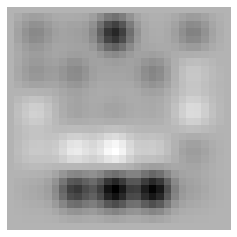

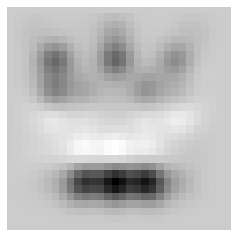

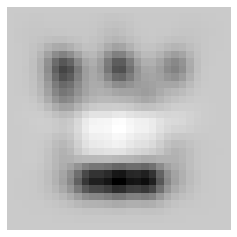

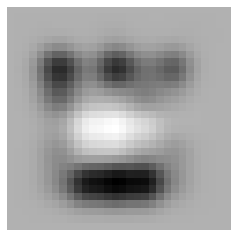

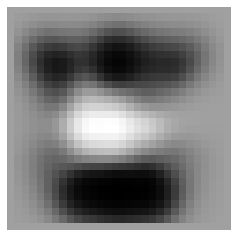

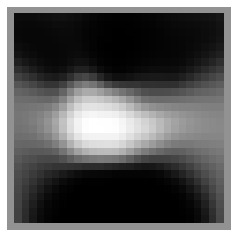

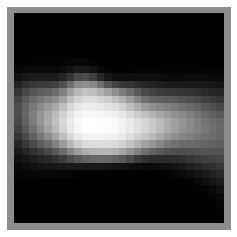

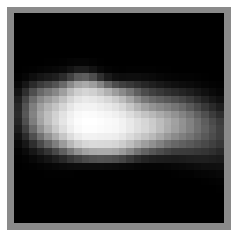

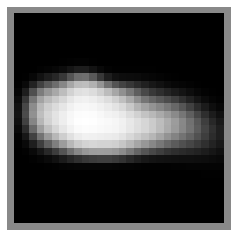

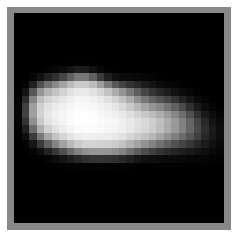

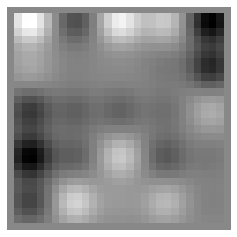

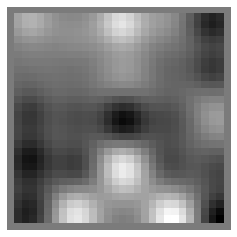

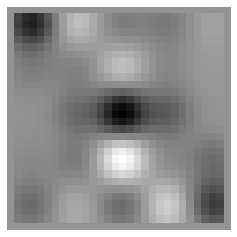

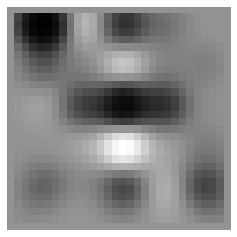

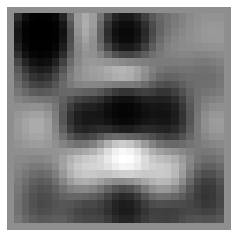

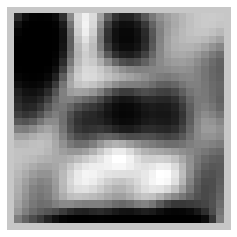

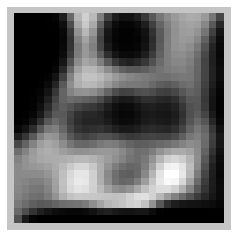

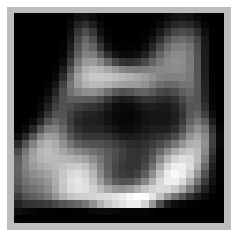

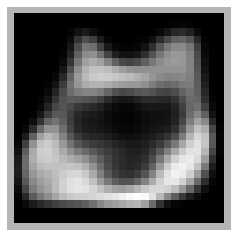

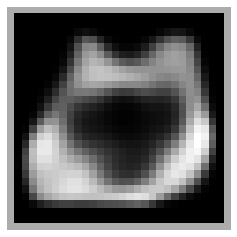

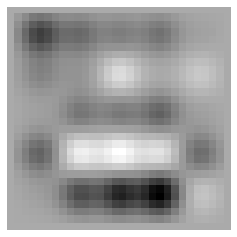

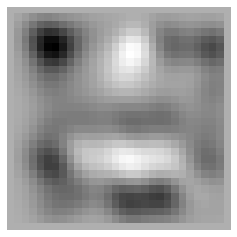

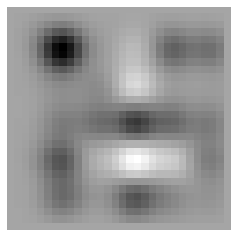

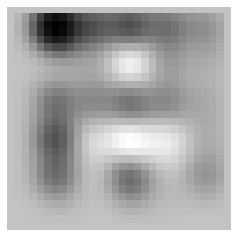

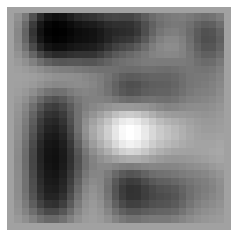

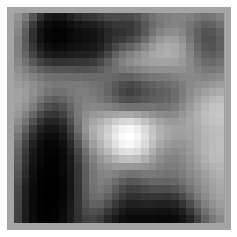

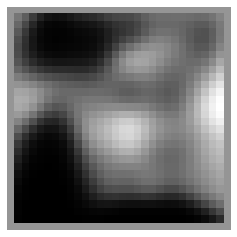

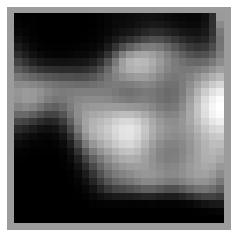

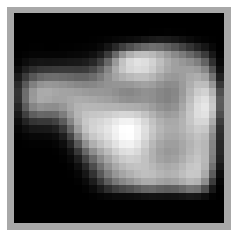

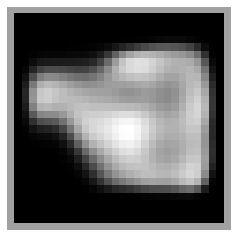

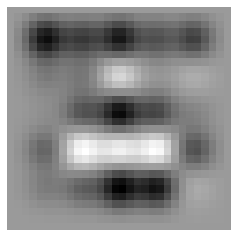

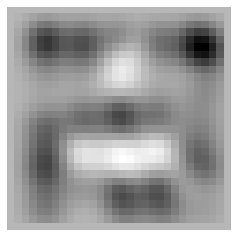

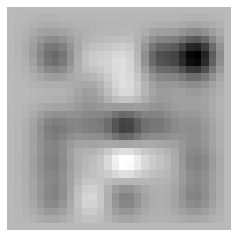

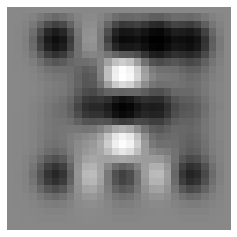

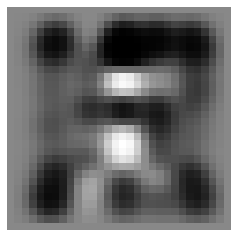

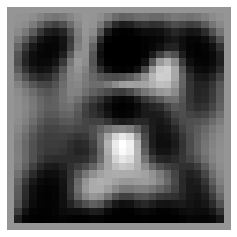

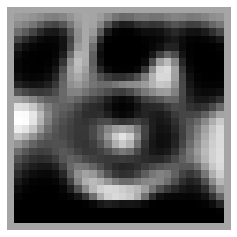

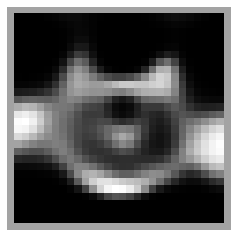

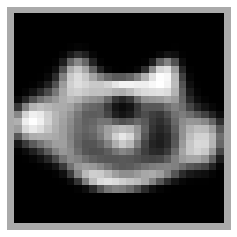

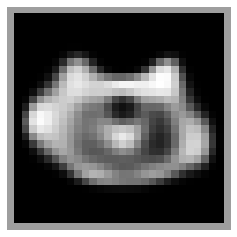

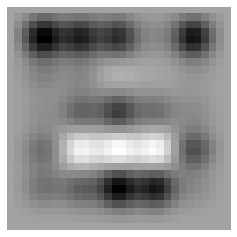

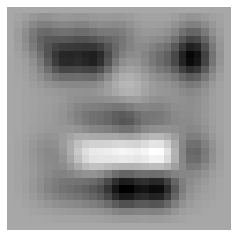

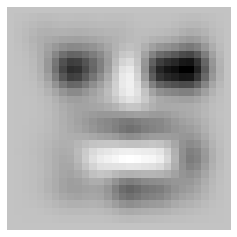

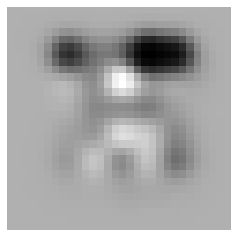

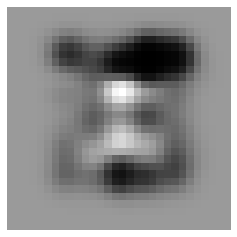

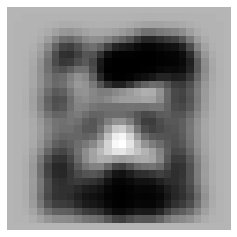

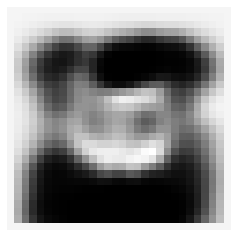

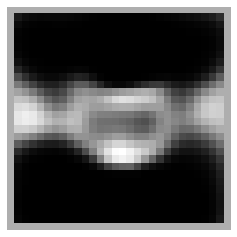

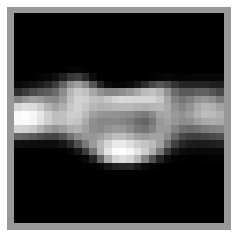

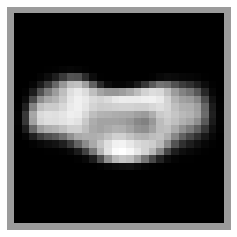

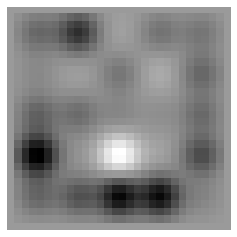

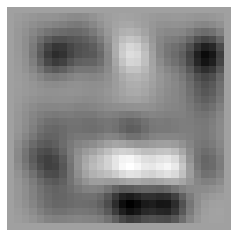

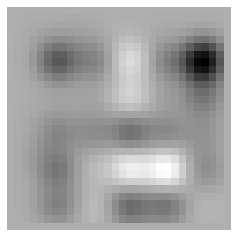

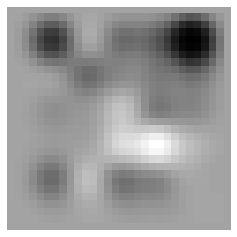

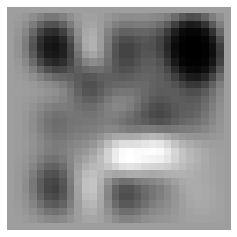

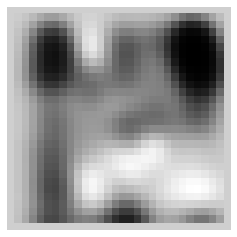

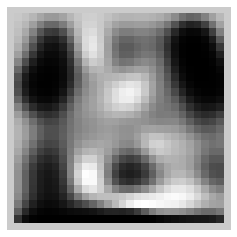

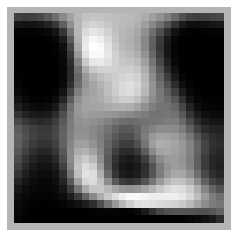

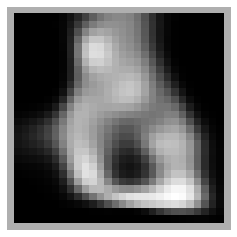

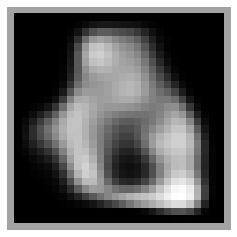

In [20]:
# TRAINING
train()

In [21]:
# SAVING MODEL
model_path = os.path.join(root_path, "src", "save", category, '%s.pth' % category)
torch.save(model.state_dict(), model_path)

In [22]:
def load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category):
    torch.set_default_tensor_type('torch.FloatTensor')
    model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
    base_path = os.getcwd().split("sliver-maestro")[0]
    model_path = os.path.join(base_path, "sliver-maestro", "src", "save", category, '%s.pth' % category)
    model.load_state_dict(torch.load(model_path))
    
    return model

def load_weights(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category):
    torch.set_default_tensor_type('torch.FloatTensor')
    model = DRAW(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
    if USE_CUDA:
        model.cuda()
    base_path = os.getcwd().split('sliver-maestro')[0]
    weights_file = os.path.join(base_path, "sliver-maestro", "src", "save", category, '%s_weights.tar' % category)
    state_dict = torch.load(weights_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)
    
    return model 

## Testing

In [23]:
# OPTION 1: LOADS MODEL WEIGHTS
model = load_weights(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

In [24]:
# OPTION 2: LOADS MODEL
model = load_model(T, A, B, batch_size, z_size, N, dec_size, enc_size, learning_rate, beta1, clip, path, category)
model.eval()

DRAW(
  (encoder): LSTMCell(306, 256)
  (mu_linear): Linear(in_features=256, out_features=10, bias=True)
  (sigma_linear): Linear(in_features=256, out_features=10, bias=True)
  (decoder): LSTMCell(10, 256)
  (dec_linear): Linear(in_features=256, out_features=5, bias=True)
  (dec_w_linear): Linear(in_features=256, out_features=25, bias=True)
  (sigmoid): Sigmoid()
)

testing...
start, end:0, 64
start, end:64, 128
start, end:128, 192
start, end:192, 256
start, end:256, 320
start, end:320, 384
start, end:384, 448
start, end:448, 512
start, end:512, 576
start, end:576, 640
start, end:640, 704
start, end:704, 768
start, end:768, 832
start, end:832, 896
start, end:896, 960
start, end:960, 1024
start, end:1024, 1088
start, end:1088, 1152
start, end:1152, 1216
start, end:1216, 1280
start, end:1280, 1344
start, end:1344, 1408
start, end:1408, 1472
start, end:1472, 1536
start, end:1536, 1600
Phase: test | Epoch: 0 | Count: 25 \ Start Time: 23:29:51 | Loss: 59
start, end:1600, 1664
start, end:1664, 1728
start, end:1728, 1792
start, end:1792, 1856
start, end:1856, 1920
start, end:1920, 1984
start, end:1984, 2048
start, end:2048, 2112
start, end:2112, 2176
start, end:2176, 2240
start, end:2240, 2304
start, end:2304, 2368
start, end:2368, 2432
start, end:2432, 2496
start, end:2496, 2560
start, end:2560, 2624
start, end:2624, 2688
start, end:2688, 2752
start, en

start, end:20608, 20672
start, end:20672, 20736
start, end:20736, 20800
Phase: test | Epoch: 0 | Count: 325 \ Start Time: 23:30:37 | Loss: 59
start, end:20800, 20864
start, end:20864, 20928
start, end:20928, 20992
start, end:20992, 21056
start, end:21056, 21120
start, end:21120, 21184
start, end:21184, 21248
start, end:21248, 21312
start, end:21312, 21376
start, end:21376, 21440
start, end:21440, 21504
start, end:21504, 21568
start, end:21568, 21632
start, end:21632, 21696
start, end:21696, 21760
start, end:21760, 21824
start, end:21824, 21888
start, end:21888, 21952
start, end:21952, 22016
start, end:22016, 22080
start, end:22080, 22144
start, end:22144, 22208
start, end:22208, 22272
start, end:22272, 22336
start, end:22336, 22400
Phase: test | Epoch: 0 | Count: 350 \ Start Time: 23:30:41 | Loss: 58
start, end:22400, 22464
start, end:22464, 22528
start, end:22528, 22592
start, end:22592, 22656
start, end:22656, 22720
start, end:22720, 22784
start, end:22784, 22848
start, end:22848, 22

start, end:16383, 16447
start, end:16447, 16511
start, end:16511, 16575
start, end:16575, 16639
start, end:16639, 16703
start, end:16703, 16767
start, end:16767, 16831
start, end:16831, 16895
start, end:16895, 16959
Phase: test | Epoch: 1 | Count: 650 \ Start Time: 23:31:25 | Loss: 58
start, end:16959, 17023
start, end:17023, 17087
start, end:17087, 17151
start, end:17151, 17215
start, end:17215, 17279
start, end:17279, 17343
start, end:17343, 17407
start, end:17407, 17471
start, end:17471, 17535
start, end:17535, 17599
start, end:17599, 17663
start, end:17663, 17727
start, end:17727, 17791
start, end:17791, 17855
start, end:17855, 17919
start, end:17919, 17983
start, end:17983, 18047
start, end:18047, 18111
start, end:18111, 18175
start, end:18175, 18239
start, end:18239, 18303
start, end:18303, 18367
start, end:18367, 18431
start, end:18431, 18495
start, end:18495, 18559
Phase: test | Epoch: 1 | Count: 675 \ Start Time: 23:31:29 | Loss: 59
start, end:18559, 18623
start, end:18623, 18

start, end:9982, 10046
start, end:10046, 10110
start, end:10110, 10174
start, end:10174, 10238
start, end:10238, 10302
start, end:10302, 10366
start, end:10366, 10430
start, end:10430, 10494
start, end:10494, 10558
start, end:10558, 10622
start, end:10622, 10686
start, end:10686, 10750
start, end:10750, 10814
start, end:10814, 10878
start, end:10878, 10942
start, end:10942, 11006
start, end:11006, 11070
start, end:11070, 11134
start, end:11134, 11198
start, end:11198, 11262
start, end:11262, 11326
start, end:11326, 11390
start, end:11390, 11454
start, end:11454, 11518
Phase: test | Epoch: 2 | Count: 950 \ Start Time: 23:32:05 | Loss: 59
start, end:11518, 11582
start, end:11582, 11646
start, end:11646, 11710
start, end:11710, 11774
start, end:11774, 11838
start, end:11838, 11902
start, end:11902, 11966
start, end:11966, 12030
start, end:12030, 12094
start, end:12094, 12158
start, end:12158, 12222
start, end:12222, 12286
start, end:12286, 12350
start, end:12350, 12414
start, end:12414, 1

start, end:5437, 5501
start, end:5501, 5565
start, end:5565, 5629
start, end:5629, 5693
start, end:5693, 5757
start, end:5757, 5821
start, end:5821, 5885
start, end:5885, 5949
start, end:5949, 6013
start, end:6013, 6077
Phase: test | Epoch: 3 | Count: 1250 \ Start Time: 23:32:33 | Loss: 59
start, end:6077, 6141
start, end:6141, 6205
start, end:6205, 6269
start, end:6269, 6333
start, end:6333, 6397
start, end:6397, 6461
start, end:6461, 6525
start, end:6525, 6589
start, end:6589, 6653
start, end:6653, 6717
start, end:6717, 6781
start, end:6781, 6845
start, end:6845, 6909
start, end:6909, 6973
start, end:6973, 7037
start, end:7037, 7101
start, end:7101, 7165
start, end:7165, 7229
start, end:7229, 7293
start, end:7293, 7357
start, end:7357, 7421
start, end:7421, 7485
start, end:7485, 7549
start, end:7549, 7613
start, end:7613, 7677
Phase: test | Epoch: 3 | Count: 1275 \ Start Time: 23:32:36 | Loss: 59
start, end:7677, 7741
start, end:7741, 7805
start, end:7805, 7869
start, end:7869, 7933


start, end:23165, 23229
start, end:23229, 23293
start, end:23293, 23357
start, end:23357, 23421
start, end:23421, 23485
start, end:23485, 23549
start, end:23549, 23613
start, end:23613, 23677
Phase: test | Epoch: 3 | Count: 1525 \ Start Time: 23:33:03 | Loss: 59
start, end:23677, 23741
start, end:23741, 23805
start, end:23805, 23869
start, end:23869, 23933
start, end:23933, 23997
start, end:23997, 24061
start, end:24061, 24125
start, end:24125, 24189
start, end:24189, 24253
start, end:24253, 24317
start, end:24317, 24381
start, end:24381, 24445
start, end:24445, 24509
start, end:24509, 24573
start, end:24573, 24637
start, end:0, 60
start, end:60, 124
start, end:124, 188
start, end:188, 252
start, end:252, 316
start, end:316, 380
start, end:380, 444
start, end:444, 508
start, end:508, 572
start, end:572, 636
Phase: test | Epoch: 4 | Count: 1550 \ Start Time: 23:33:06 | Loss: 58
start, end:636, 700
start, end:700, 764
start, end:764, 828
start, end:828, 892
start, end:892, 956
start, end

start, end:18876, 18940
start, end:18940, 19004
start, end:19004, 19068
start, end:19068, 19132
start, end:19132, 19196
start, end:19196, 19260
start, end:19260, 19324
start, end:19324, 19388
start, end:19388, 19452
start, end:19452, 19516
start, end:19516, 19580
start, end:19580, 19644
start, end:19644, 19708
start, end:19708, 19772
start, end:19772, 19836
Phase: test | Epoch: 4 | Count: 1850 \ Start Time: 23:33:40 | Loss: 59
start, end:19836, 19900
start, end:19900, 19964
start, end:19964, 20028
start, end:20028, 20092
start, end:20092, 20156
start, end:20156, 20220
start, end:20220, 20284
start, end:20284, 20348
start, end:20348, 20412
start, end:20412, 20476
start, end:20476, 20540
start, end:20540, 20604
start, end:20604, 20668
start, end:20668, 20732
start, end:20732, 20796
start, end:20796, 20860
start, end:20860, 20924
start, end:20924, 20988
start, end:20988, 21052
start, end:21052, 21116
start, end:21116, 21180
start, end:21180, 21244
start, end:21244, 21308
start, end:21308,

start, end:14651, 14715
start, end:14715, 14779
start, end:14779, 14843
start, end:14843, 14907
start, end:14907, 14971
start, end:14971, 15035
start, end:15035, 15099
start, end:15099, 15163
start, end:15163, 15227
start, end:15227, 15291
start, end:15291, 15355
start, end:15355, 15419
start, end:15419, 15483
start, end:15483, 15547
start, end:15547, 15611
start, end:15611, 15675
start, end:15675, 15739
start, end:15739, 15803
start, end:15803, 15867
start, end:15867, 15931
start, end:15931, 15995
Phase: test | Epoch: 5 | Count: 2175 \ Start Time: 23:34:16 | Loss: 59
start, end:15995, 16059
start, end:16059, 16123
start, end:16123, 16187
start, end:16187, 16251
start, end:16251, 16315
start, end:16315, 16379
start, end:16379, 16443
start, end:16443, 16507
start, end:16507, 16571
start, end:16571, 16635
start, end:16635, 16699
start, end:16699, 16763
start, end:16763, 16827
start, end:16827, 16891
start, end:16891, 16955
start, end:16955, 17019
start, end:17019, 17083
start, end:17083,

start, end:8122, 8186
start, end:8186, 8250
start, end:8250, 8314
start, end:8314, 8378
start, end:8378, 8442
start, end:8442, 8506
start, end:8506, 8570
start, end:8570, 8634
start, end:8634, 8698
start, end:8698, 8762
start, end:8762, 8826
start, end:8826, 8890
start, end:8890, 8954
Phase: test | Epoch: 6 | Count: 2450 \ Start Time: 23:34:52 | Loss: 59
start, end:8954, 9018
start, end:9018, 9082
start, end:9082, 9146
start, end:9146, 9210
start, end:9210, 9274
start, end:9274, 9338
start, end:9338, 9402
start, end:9402, 9466
start, end:9466, 9530
start, end:9530, 9594
start, end:9594, 9658
start, end:9658, 9722
start, end:9722, 9786
start, end:9786, 9850
start, end:9850, 9914
start, end:9914, 9978
start, end:9978, 10042
start, end:10042, 10106
start, end:10106, 10170
start, end:10170, 10234
start, end:10234, 10298
start, end:10298, 10362
start, end:10362, 10426
start, end:10426, 10490
start, end:10490, 10554
Phase: test | Epoch: 6 | Count: 2475 \ Start Time: 23:34:55 | Loss: 59
start

Phase: test | Epoch: 7 | Count: 2750 \ Start Time: 23:35:23 | Loss: 59
start, end:3513, 3577
start, end:3577, 3641
start, end:3641, 3705
start, end:3705, 3769
start, end:3769, 3833
start, end:3833, 3897
start, end:3897, 3961
start, end:3961, 4025
start, end:4025, 4089
start, end:4089, 4153
start, end:4153, 4217
start, end:4217, 4281
start, end:4281, 4345
start, end:4345, 4409
start, end:4409, 4473
start, end:4473, 4537
start, end:4537, 4601
start, end:4601, 4665
start, end:4665, 4729
start, end:4729, 4793
start, end:4793, 4857
start, end:4857, 4921
start, end:4921, 4985
start, end:4985, 5049
start, end:5049, 5113
Phase: test | Epoch: 7 | Count: 2775 \ Start Time: 23:35:26 | Loss: 59
start, end:5113, 5177
start, end:5177, 5241
start, end:5241, 5305
start, end:5305, 5369
start, end:5369, 5433
start, end:5433, 5497
start, end:5497, 5561
start, end:5561, 5625
start, end:5625, 5689
start, end:5689, 5753
start, end:5753, 5817
start, end:5817, 5881
start, end:5881, 5945
start, end:5945, 6009


start, end:21241, 21305
start, end:21305, 21369
start, end:21369, 21433
start, end:21433, 21497
start, end:21497, 21561
start, end:21561, 21625
start, end:21625, 21689
start, end:21689, 21753
start, end:21753, 21817
start, end:21817, 21881
start, end:21881, 21945
start, end:21945, 22009
start, end:22009, 22073
start, end:22073, 22137
start, end:22137, 22201
start, end:22201, 22265
start, end:22265, 22329
start, end:22329, 22393
start, end:22393, 22457
start, end:22457, 22521
start, end:22521, 22585
start, end:22585, 22649
start, end:22649, 22713
Phase: test | Epoch: 7 | Count: 3050 \ Start Time: 23:36:01 | Loss: 58
start, end:22713, 22777
start, end:22777, 22841
start, end:22841, 22905
start, end:22905, 22969
start, end:22969, 23033
start, end:23033, 23097
start, end:23097, 23161
start, end:23161, 23225
start, end:23225, 23289
start, end:23289, 23353
start, end:23353, 23417
start, end:23417, 23481
start, end:23481, 23545
start, end:23545, 23609
start, end:23609, 23673
start, end:23673,

start, end:17144, 17208
start, end:17208, 17272
Phase: test | Epoch: 8 | Count: 3350 \ Start Time: 23:36:47 | Loss: 58
start, end:17272, 17336
start, end:17336, 17400
start, end:17400, 17464
start, end:17464, 17528
start, end:17528, 17592
start, end:17592, 17656
start, end:17656, 17720
start, end:17720, 17784
start, end:17784, 17848
start, end:17848, 17912
start, end:17912, 17976
start, end:17976, 18040
start, end:18040, 18104
start, end:18104, 18168
start, end:18168, 18232
start, end:18232, 18296
start, end:18296, 18360
start, end:18360, 18424
start, end:18424, 18488
start, end:18488, 18552
start, end:18552, 18616
start, end:18616, 18680
start, end:18680, 18744
start, end:18744, 18808
start, end:18808, 18872
Phase: test | Epoch: 8 | Count: 3375 \ Start Time: 23:36:53 | Loss: 59
start, end:18872, 18936
start, end:18936, 19000
start, end:19000, 19064
start, end:19064, 19128
start, end:19128, 19192
start, end:19192, 19256
start, end:19256, 19320
start, end:19320, 19384
start, end:19384, 

start, end:12919, 12983
start, end:12983, 13047
start, end:13047, 13111
start, end:13111, 13175
start, end:13175, 13239
start, end:13239, 13303
start, end:13303, 13367
start, end:13367, 13431
Phase: test | Epoch: 9 | Count: 3675 \ Start Time: 23:38:04 | Loss: 58
start, end:13431, 13495
start, end:13495, 13559
start, end:13559, 13623
start, end:13623, 13687
start, end:13687, 13751
start, end:13751, 13815
start, end:13815, 13879
start, end:13879, 13943
start, end:13943, 14007
start, end:14007, 14071
start, end:14071, 14135
start, end:14135, 14199
start, end:14199, 14263
start, end:14263, 14327
start, end:14327, 14391
start, end:14391, 14455
start, end:14455, 14519
start, end:14519, 14583
start, end:14583, 14647
start, end:14647, 14711
start, end:14711, 14775
start, end:14775, 14839
start, end:14839, 14903
start, end:14903, 14967
start, end:14967, 15031
Phase: test | Epoch: 9 | Count: 3700 \ Start Time: 23:38:09 | Loss: 59
start, end:15031, 15095
start, end:15095, 15159
start, end:15159, 

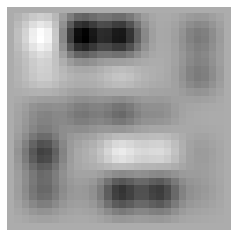

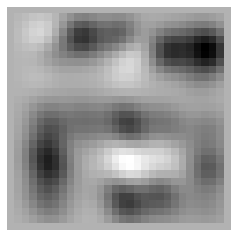

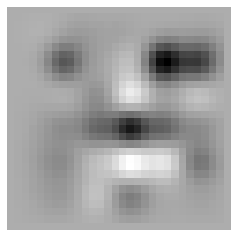

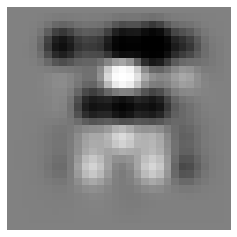

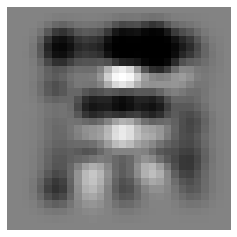

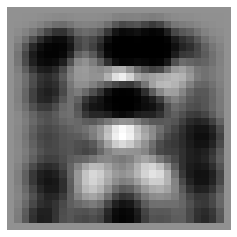

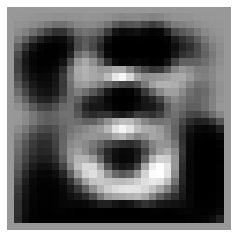

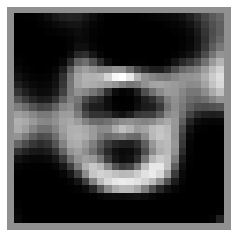

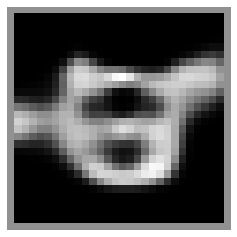

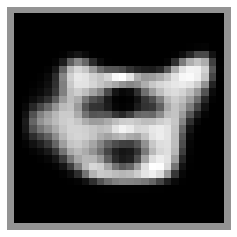

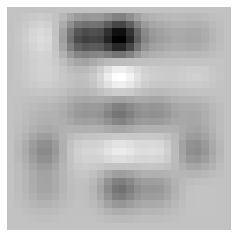

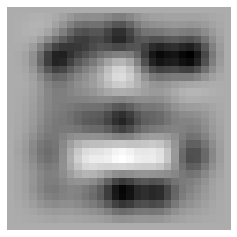

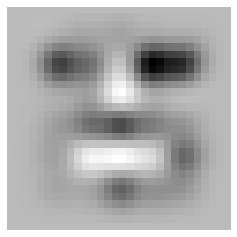

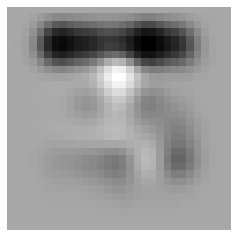

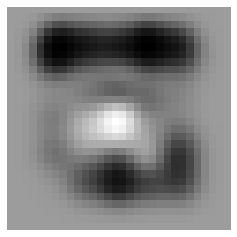

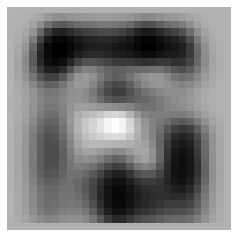

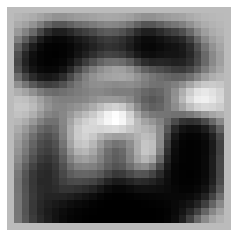

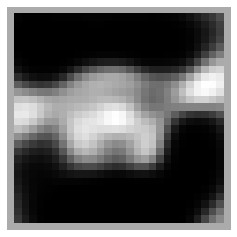

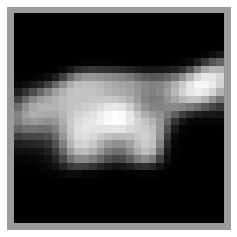

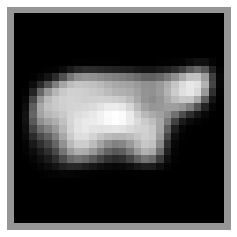

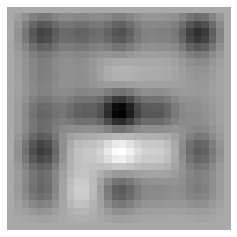

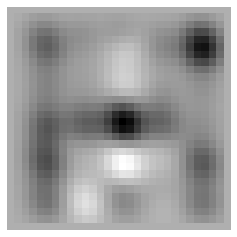

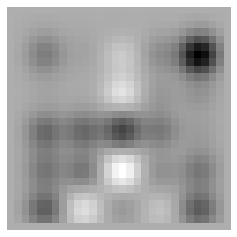

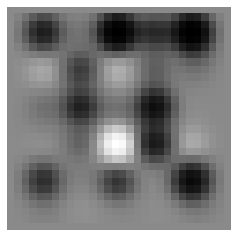

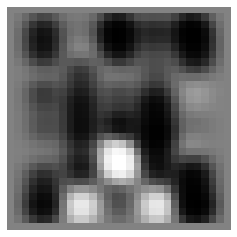

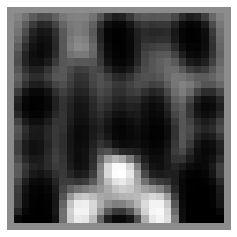

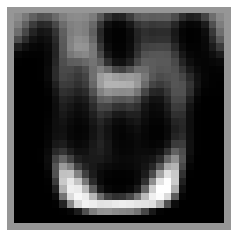

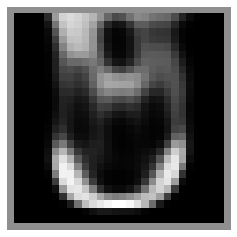

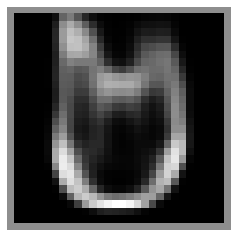

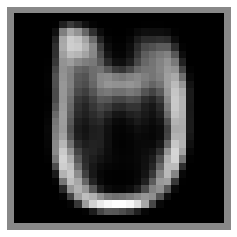

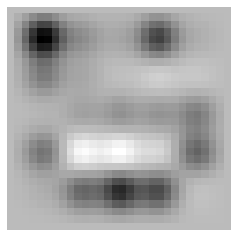

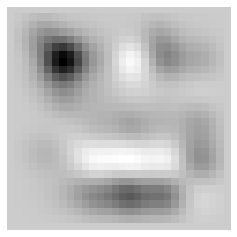

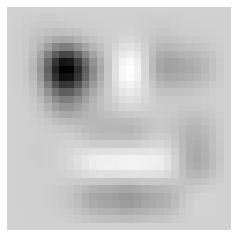

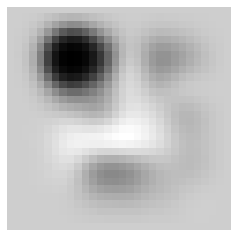

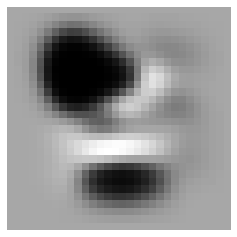

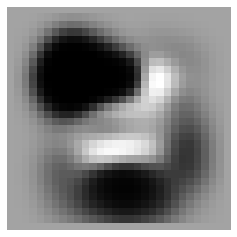

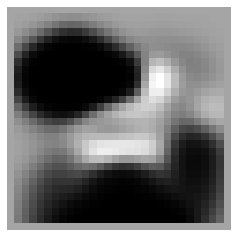

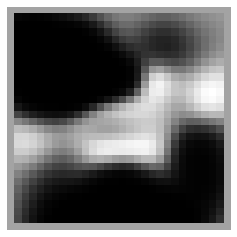

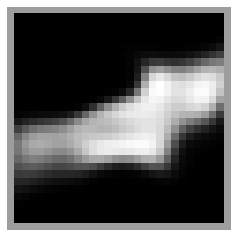

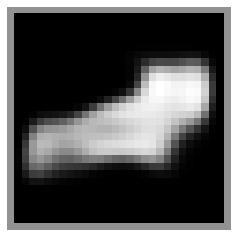

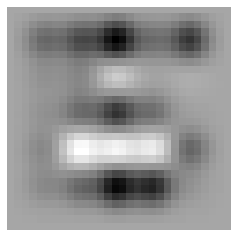

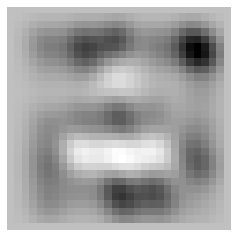

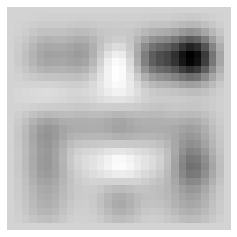

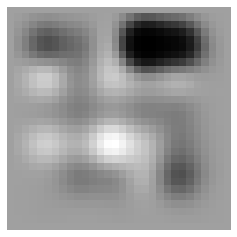

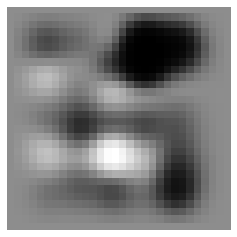

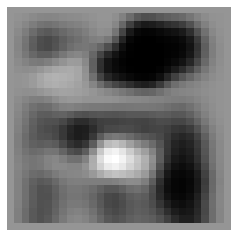

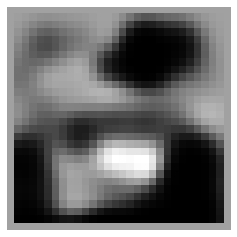

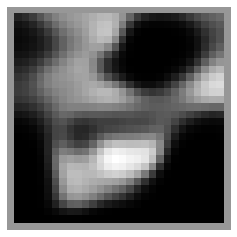

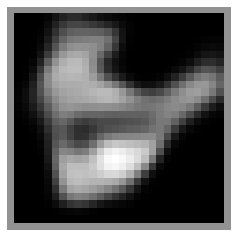

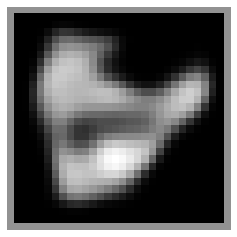

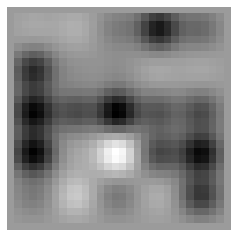

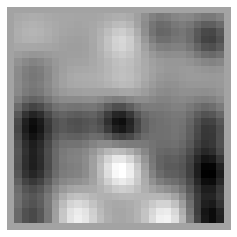

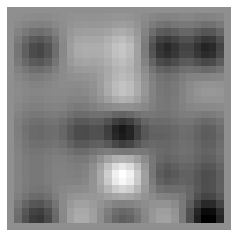

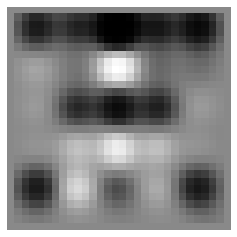

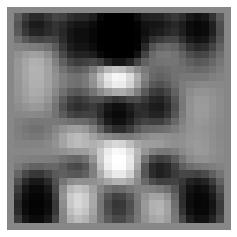

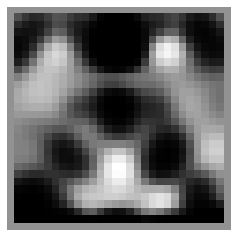

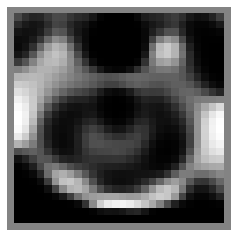

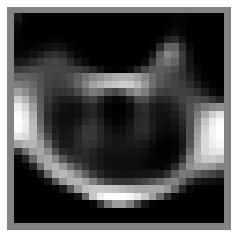

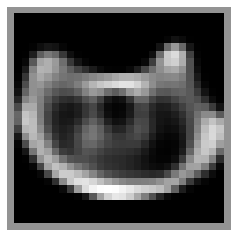

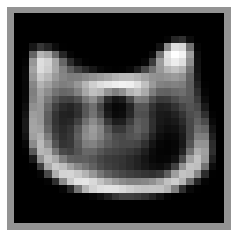

In [25]:
test()